# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data (https://www.the-numbers.com/movie/budgets). 

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

Let's get a **high-level understanding of the data** in our dataframe.

In [4]:
print(data.shape)
print(data.columns)
print(data.count())
print(data.head())
data.tail()

(5391, 6)
Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')
Rank                     5391
Release_Date             5391
Movie_Title              5391
USD_Production_Budget    5391
USD_Worldwide_Gross      5391
USD_Domestic_Gross       5391
dtype: int64
   Rank Release_Date                     Movie_Title USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation              $110,000   
1  5140     5/9/1916                     Intolerance              $385,907   
2  5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3  5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4  5222     1/1/1925                  The Big Parade              $245,000   

  USD_Worldwide_Gross USD_Domestic_Gross  
0         $11,000,000        $10,000,000  
1                  $0                 $0  
2          $8,000,000         $8,000,000  
3         

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [6]:
data.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5117,4946,1/3/2016,1982,"$1,000,000",$0,$0


In [7]:
data.isna().values.any()

False

In [8]:
data.duplicated().values.any()

False

In [9]:
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

0

### Data Type Conversions

Let's **convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format** by removing `$` signs and `,`. 

In [10]:
chars_to_remove = [",", "$"]
columns_to_clean = ["USD_Production_Budget", 
                    "USD_Worldwide_Gross", 
                    "USD_Domestic_Gross"]

for col in columns_to_clean:
    for char in chars_to_remove:
        data[col] = data[col].astype(str).str.replace(char, "")
    data[col] = pd.to_numeric(data[col])
    
data.sample(5)

<ipython-input-10-0c0e498799ca>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace(char, "")


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1979,1098,2/21/2003,The Life of David Gale,50000000,28920188,19694635
4145,1651,4/27/2012,Safe,33000000,41495213,17142080
4908,105,5/22/2015,Tomorrowland,170000000,207283457,93436322
2258,2535,7/16/2004,A Cinderella Story,19000000,70164105,51438175
2555,1047,11/23/2005,Syriana,50000000,92690959,50824620


Let's **convert the `Release_Date` column to a Pandas Datetime** type. 

In [11]:
data.Release_Date = pd.to_datetime(data.Release_Date)
print(data.head())
data.info()

   Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  
0             11000000            10000000  
1                    0                   0  
2              8000000             8000000  
3              3000000             3000000  
4             22000000            11000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   539

### Descriptive Statistics

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [12]:
data.USD_Production_Budget.mean()

31113737.57837136

In [13]:
data.USD_Worldwide_Gross.mean()

88855421.96271564

In [14]:
data.USD_Worldwide_Gross.min()

0

In [15]:
data.USD_Domestic_Gross.min()

0

In [16]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [17]:
print(data.USD_Production_Budget.max())
data.loc[data.USD_Production_Budget.idxmax()]

425000000


Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object

In [18]:
print(data.USD_Worldwide_Gross.max())
data.loc[data.USD_Worldwide_Gross.idxmax()]

2783918982


Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object

In [19]:
print(data.USD_Production_Budget.min())
data.loc[data.USD_Production_Budget.idxmin()]

1100


Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                   1100
USD_Worldwide_Gross                   181041
USD_Domestic_Gross                    181041
Name: 2427, dtype: object

# Investigating the Zero Revenue Films

In [20]:
print(data[data.USD_Domestic_Gross == 0].count())
zero_domestic_gross = data[data.USD_Domestic_Gross == 0]
print(zero_domestic_gross.loc[zero_domestic_gross.USD_Production_Budget.idxmax()])
zero_domestic_gross.sort_values("USD_Production_Budget", ascending=False)

Rank                     512
Release_Date             512
Movie_Title              512
USD_Production_Budget    512
USD_Worldwide_Gross      512
USD_Domestic_Gross       512
dtype: int64
Rank                                      96
Release_Date             2020-12-31 00:00:00
Movie_Title                      Singularity
USD_Production_Budget              175000000
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
Name: 5388, dtype: object


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [21]:
print(data[data.USD_Worldwide_Gross == 0].count())
zero_worldwide_gross = data[data.USD_Worldwide_Gross == 0]
print(zero_worldwide_gross.loc[zero_worldwide_gross.USD_Production_Budget.idxmax()])
zero_worldwide_gross.sort_values("USD_Production_Budget", ascending=False)

Rank                     357
Release_Date             357
Movie_Title              357
USD_Production_Budget    357
USD_Worldwide_Gross      357
USD_Domestic_Gross       357
dtype: int64
Rank                                      96
Release_Date             2020-12-31 00:00:00
Movie_Title                      Singularity
USD_Production_Budget              175000000
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
Name: 5388, dtype: object


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [22]:
international_releases = data.loc[(data.USD_Worldwide_Gross != 0) & (data.USD_Domestic_Gross == 0)]
international_releases.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3948,2157,2011-08-07,Ironclad,25000000,5297411,0
4609,4149,2014-06-06,Anna,4357373,1200000,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
3305,3018,2008-12-31,Ca$h,13700000,11738256,0
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0


In [23]:
international_releases = data.query("USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0")
print(f"Number of international releases: {len(international_releases)}")
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films



In [24]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [25]:
data[data.Release_Date > scrape_date].count()
not_released_films = data[data.Release_Date > scrape_date]

In [26]:
data_clean = data.drop(not_released_films.index)

### Films that Lost Money

What is the **percentage of films where the production costs exceeded the worldwide gross revenue**? 

In [29]:
# print(data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross])
# data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross].count() / data_clean.count() * 100
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(money_losing) / len(data_clean) * 100

37.27711738484398

# Seaborn for Data Viz: Bubble Charts

In [31]:
import seaborn as sns

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

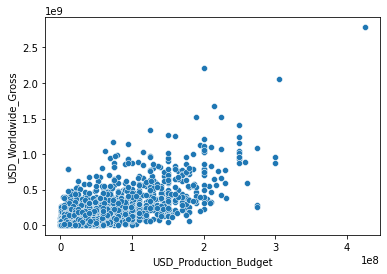

In [32]:
sns.scatterplot(data=data_clean, 
                x="USD_Production_Budget", 
                y="USD_Worldwide_Gross")

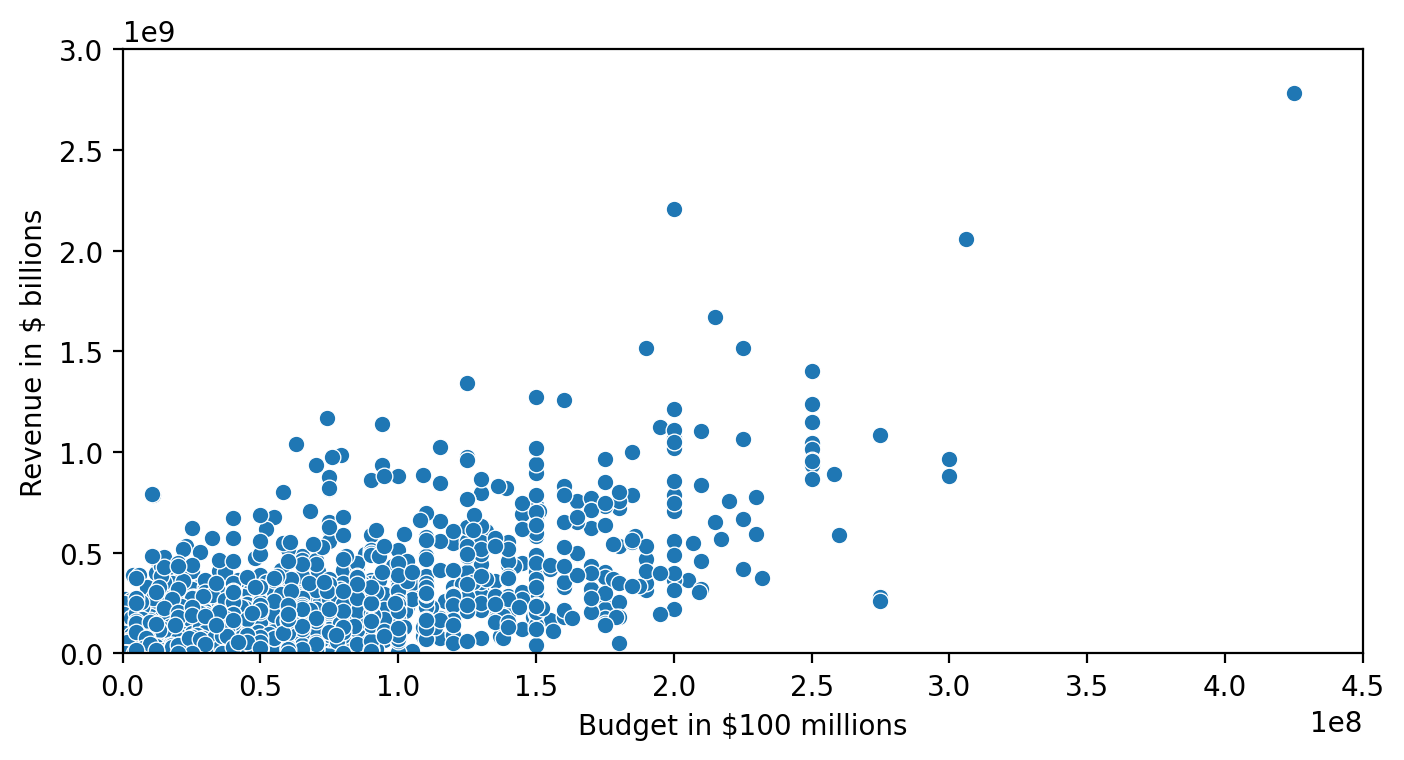

In [33]:
plt.figure(figsize=(8, 4), dpi=200)
ax = sns.scatterplot(data=data_clean, 
                     x="USD_Production_Budget", 
                     y="USD_Worldwide_Gross")
ax.set(ylim=(0, 3000000000), 
       xlim=(0, 450000000), 
       ylabel="Revenue in $ billions", 
       xlabel="Budget in $100 millions")
plt.show()

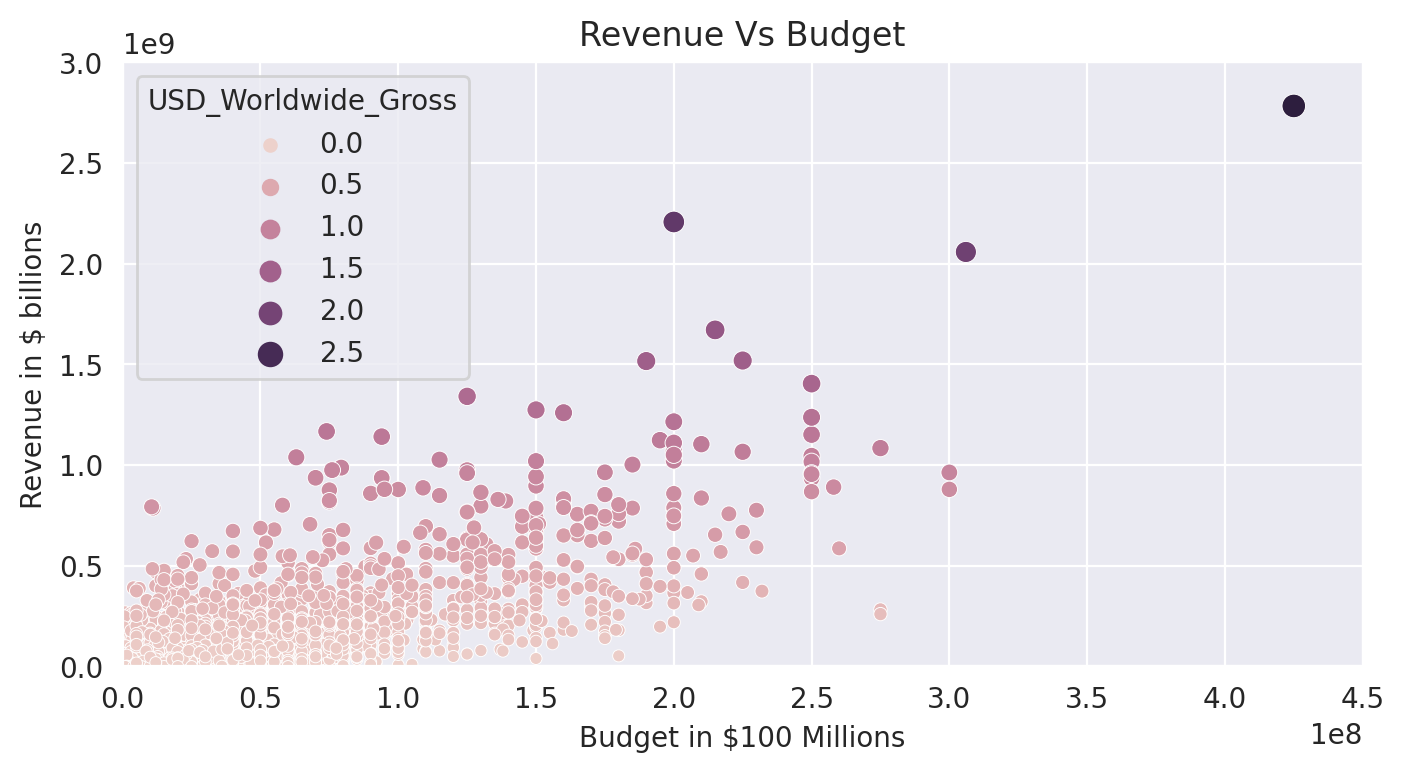

In [34]:
plt.figure(figsize=(8, 4), dpi=200)
# set styling on a single chart
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                         x="USD_Production_Budget", 
                         y="USD_Worldwide_Gross", 
                         hue="USD_Worldwide_Gross", #color
                         size="USD_Worldwide_Gross") #dot size
    ax.set(ylim=(0, 3000000000), 
           xlim=(0, 450000000), 
           ylabel="Revenue in $ billions", 
           xlabel="Budget in $100 Millions", 
           title="Revenue Vs Budget")
plt.show()

### Plotting Movie Releases over Time



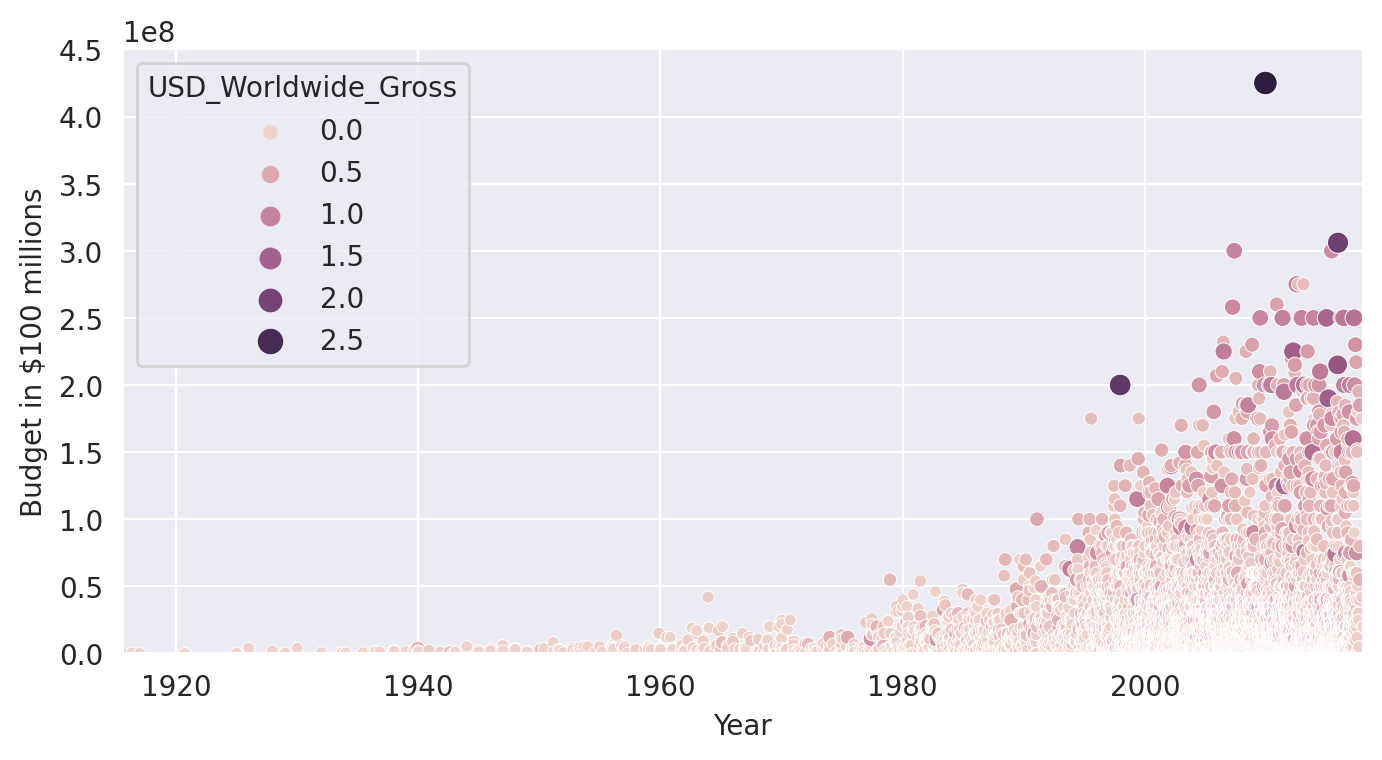

In [35]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                         x="Release_Date", 
                         y="USD_Production_Budget", 
                         hue="USD_Worldwide_Gross", 
                         size="USD_Worldwide_Gross")
    ax.set(ylim=(0, 450000000), 
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()), 
           ylabel="Budget in $100 millions", 
           xlabel="Year")
plt.show()

# Converting Years to Decades Trick

Let's **create a column in `data_clean` that has the decade of the release**. 


In [36]:
dt_index = pd.DatetimeIndex(data_clean["Release_Date"])
years = dt_index.year
print(years)
decades = years // 10 * 10
data_clean["Decade"] = decades
data_clean.head()

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films



In [37]:
old_films = data_clean[data_clean["Release_Date"] < "1970-01-01"]
#or old_films = data_clean[data_clean.Decade <= 1960]
old_films.head()
old_films.tail()
print(old_films.count())
old_films.loc[old_films.USD_Production_Budget.idxmax()]

Rank                     153
Release_Date             153
Movie_Title              153
USD_Production_Budget    153
USD_Worldwide_Gross      153
USD_Domestic_Gross       153
Decade                   153
dtype: int64


Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
Decade                                  1960
Name: 109, dtype: object

In [38]:
new_films = data_clean[data_clean["Release_Date"] >= "1970-01-01"]
#or new_films = data_clean[data_clean.Decade > 1960]
new_films.head()
new_films.tail()
print(new_films.count())
new_films.loc[new_films.USD_Production_Budget.idxmin()]

Rank                     5231
Release_Date             5231
Movie_Title              5231
USD_Production_Budget    5231
USD_Worldwide_Gross      5231
USD_Domestic_Gross       5231
Decade                   5231
dtype: int64


Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                   1100
USD_Worldwide_Gross                   181041
USD_Domestic_Gross                    181041
Decade                                  2000
Name: 2427, dtype: object

# Seaborn Regression Plots

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

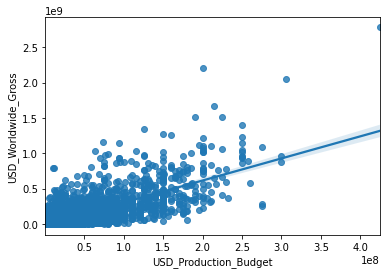

In [39]:
sns.regplot(data=new_films, 
            x="USD_Production_Budget", 
            y="USD_Worldwide_Gross")

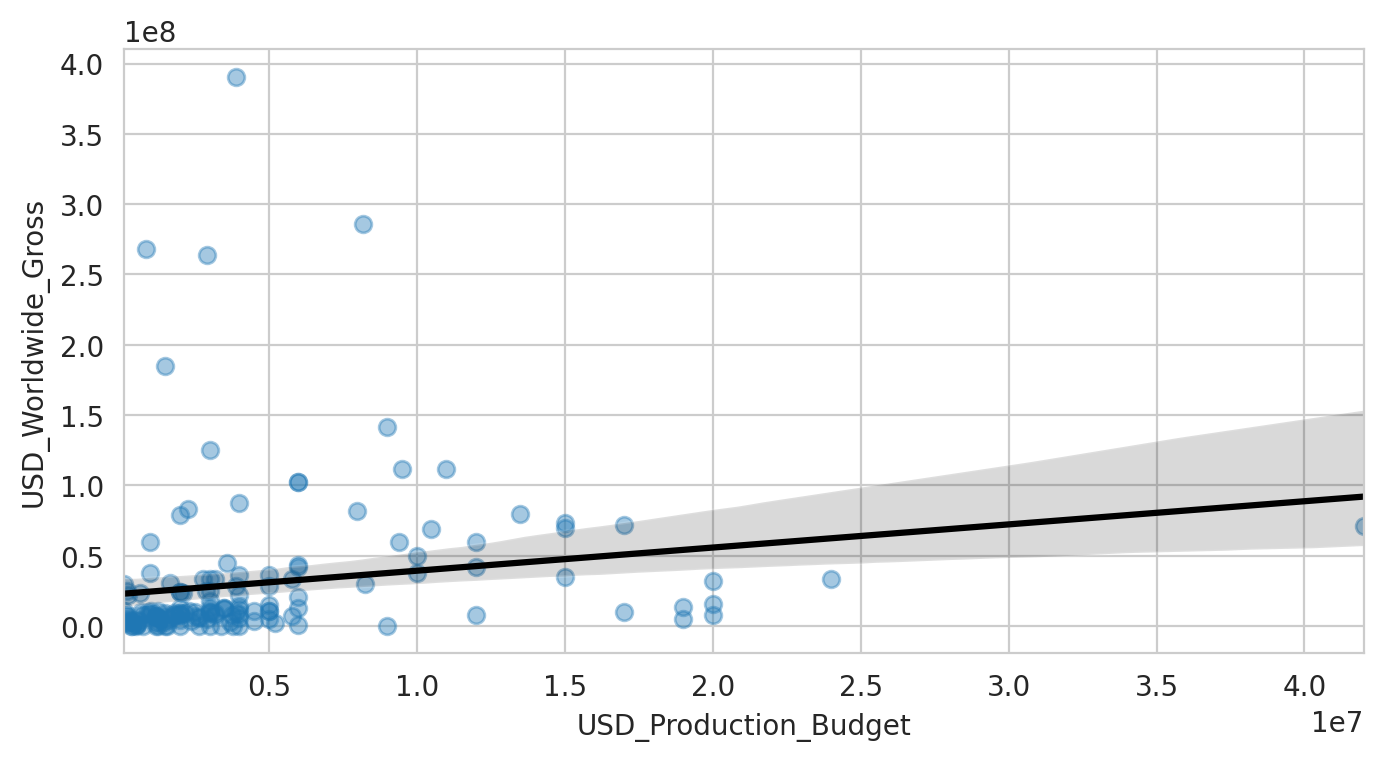

In [40]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films, 
                x="USD_Production_Budget", 
                y="USD_Worldwide_Gross", 
                scatter_kws={"alpha": 0.4}, 
                line_kws={"color": "black"})
plt.show()

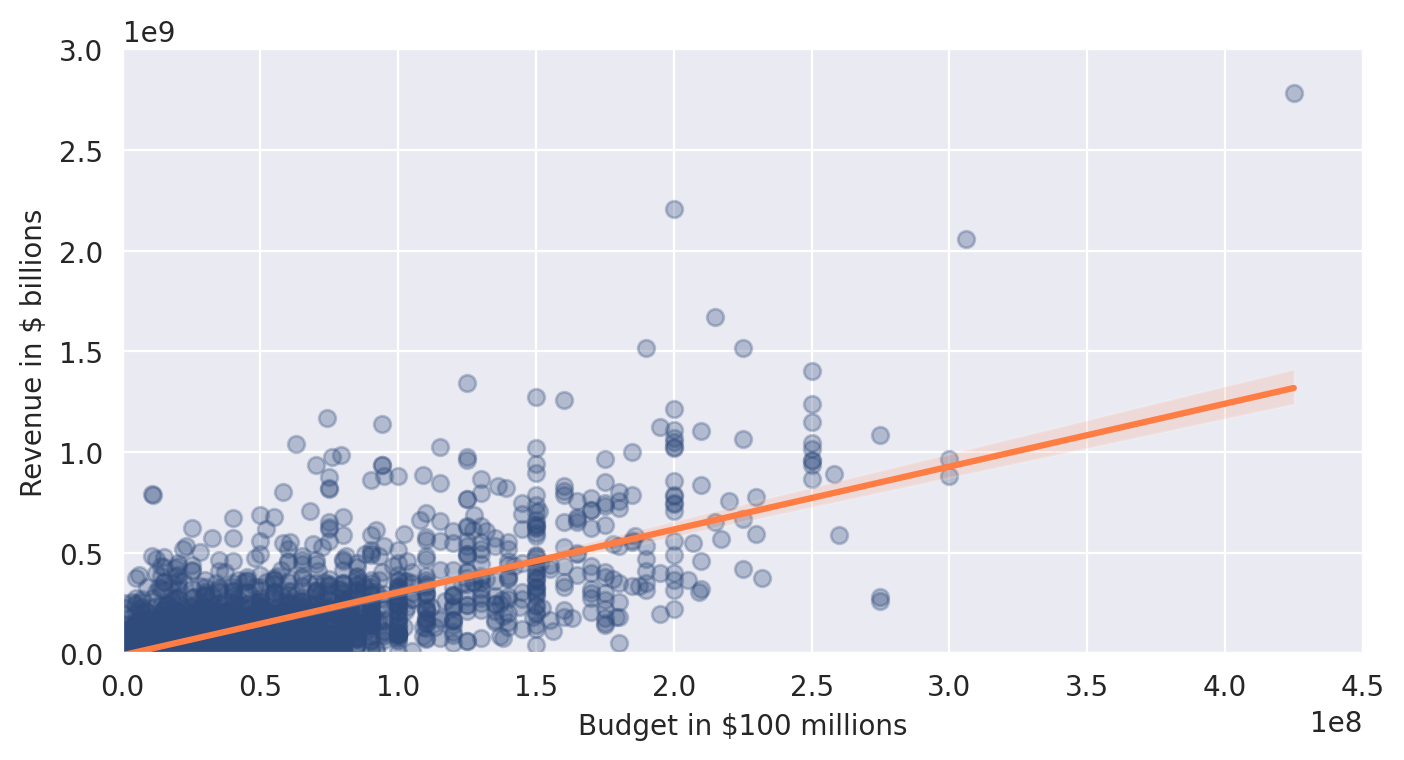

In [41]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films, 
                x="USD_Production_Budget", 
                y="USD_Worldwide_Gross", 
                color="#2f4b7c",
                scatter_kws={"alpha": 0.3}, 
                line_kws={"color": "#ff7c43"})
    ax.set(ylim=(0, 3000000000), 
           xlim=(0, 450000000), 
           ylabel="Revenue in $ billions", 
           xlabel="Budget in $100 millions")
plt.show()

# Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [42]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [43]:
#Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])
#Response variable or Target
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])

#Find the best-fit line
regression.fit(X, y)

LinearRegression()

In [44]:
# Theta zero
regression.intercept_

array([-8650768.00661027])

In [45]:
# Theta one
regression.coef_

array([[3.12259592]])

In [46]:
# R-squared
regression.score(X, y)

0.5577032617720403

In [47]:
X = pd.DataFrame(data=old_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(data=old_films, columns=["USD_Worldwide_Gross"])

regression.fit(X, y)

LinearRegression()

In [48]:
regression.intercept_

array([22821538.63508038])

In [49]:
regression.coef_

array([[1.64771314]])

In [50]:
regression.score(X, y)

0.02937258620576877

# Use Your Model to Make a Prediction


**How much global revenue does the model estimate for a film with a budget of $350 million**? 

In [51]:
22821538 + 1.64771314 * 350000000

599521137.0

In [53]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0, 0] * budget
revenue_estimate = round(revenue_estimate, -6)
print(f"The estimated revenue for a $350 mln film is around {revenue_estimate:.10}")

The estimated revenue for a $350 mln film is around 600000000.0
